<a href="https://colab.research.google.com/github/yeaeunJi/deep_learning-/blob/main/%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망(RNN)
- 피드포워드(feed forward) 
  - 흐름의 반향이 반방향인 신경망으로 폭포수처럼 한 방향으로만 신호가 전달되는 신경망임
  - 구성이 단순하여 구조를 이해하기 쉽고 많은 문제에 응용 가능하지만, 시계열 데이터를 잘 다루지 못함(시계열 데이터의 성질(패턴)을 충분히 학습하지 못함
  - 이 문제를 해결할 수 있는 것이 순환 신경망(Reccurent Neural Network, RNN)임

## 확률과 언어 모델
### word2vec을 확률 관점에서 본다면
- 맥락 단어드로부터 타깃 단어를 추측하는 일을 수행하는 것이 word2vec, 그중에서도 CBOW 모델임
- CBOW 모델을 확률로 나타낸다면 사후 확률로 나타낼 수 있는데, 맥락 단어가 주어졌을 떄, 타깃 단어가 일어날 확률을 의미
- 만약 맥락을 왼쪽 윈도우만으로 설정하여 생각해본다면, 타깃 단어 기준으로 왼쪽의 윈도우 사이즈 크기만큼의 단어가 주어졌을 때, 타킷 단어가 일어날 확률로 생각해볼 수 있음
- 이 COBOW 모델이 다루는 손실함수 교차 엔트로피 오차를 유도하게 된다면 

      L = -logP(Wt| Wt-2, Wt-1)

  - 말뭉치 전체의 손실 함수의 총합을 최소화하는 가중치 매개변수를 찾는 것을 통해서 맥락으로부터 타깃을 더 정확하게 추측하게 됨
  - 이렇게 학습을 진행한다면, 단어의 의미가 인코딩된 '단어의 분산표현' 역시 얻을 수 있음


### 언어 모델(Language Model)
- 단어 나열에 확률을 부여한 것으로, 특정 단어의 순서가 얼마나 자연스러운지, 일어날 가능성이 어느 정도인지를 확률로 평가함
  - 예)  i run이 i good보다 높은 확률을 출력
- 활용 사례
  - 기계번역과 음성 인식 등에 사용 가능
  - 새로운 문장 생성 시 사용 가능(언어 모델은 단어 수선의 자연스로움을 확률적으로 평가 가능하므로, 그 확률분퍼에 따라 다음에 적합한 단어를 추출할 수 있기 때문)
- 언어 모델을 수식으로 설명해보면 그 순서로 출현할 확률(동시에 발생할 확률)인 동시 확률을 사후 확률을 사용하여 분해 가능
  - 동시 확률은 사후 확률의 총곱으로 나타낼 수 있음
  - 이 사후 확률은 타깃 단어보다 왼쪽에 위치한 모든 단어를 맥락으로 했을 때의 확률임(조건부 언어모델)

** 참고 **

마르코프 연쇄(Markov Chain) 또는 마르코프 모델(Markov Model)
  - 미래의 상태가 현재 상태에만 의존해 결정되는 것을 의미

- CBOW 모델에도 이러한 언어 모델을 적용해볼 수 있지만 이 모델의 특성 상 맥락 안의 단어 순서가 무시된다는 한계가 존재함. 순서대신 분포를 사용
  - 입력층에서 은닉층으로 맥락 단어 벡터를 계산 시 CBOW에서는 순서가 중요하지 않으므로 이 벡터들이 더해지게 되고 (you, say)와 (say, you)가 같은 맥락으로 취급

- 이러한 문제를 해결하기 위해서 등장한 것이 순환 신경망임
  - RNN은 맥락이 아무리 길어도 그 맥락의 정보를 기억하는 체계를 가지고 있으며, 긴 시계열 데이터라도 대응할수 있게됨  

## RNN이란?
- 순환이란 의미는 어떠한 장소에서 출발한 후 다시 되돌아오고, 이 과정이 반복되는 것을 의미
- 이러한 순환이 일어나기 위해서는 닫힌 경로 혹은 순환하는 경로가 필요
  - 이 경로를 데이터가 순환하면서 정보가 끊임없이 갱신됨
  - 또한 데이터가 순환되기 때문에 과거의 정보를 기억하면서 동시에 최신 데이터로 갱신 가능

- 각 시각t(t번째단어)의 RNN 계층은 그 계층에서 받는 입력과 1개 전의 RNN 계층으로부터의 복제된 출력을 받아 이 두 정보를 바당으로 현 시각의 출력을 계산함
  - 이때 사용하는 활성화 함수는 tanh(쌍곡탄젠트, hyperbolic tangent 함수)를 이용해 출력을 변환함
  - 현재의 출력은 한 시각 이전 출력에 기초해 계산되므로, h라는 상태를 가지고 있으며 이를 갱신한다고 해석 가능

### BPTT(Backpropagation Through Time)
- 시간 방향으로 펼친 신겸앙의 오차역전파법
- 긴 시계열 데이터를 학습 시에는 오차역전파를 위해  매 시각 RNN 계층의 중간 데이터를 메모리에 유지해둬야하고, 시간 크기가 커지면 역전파의 기울기가 불안정해질 수 있음
  - 신경망을 통과할 때마다 기울기 값이 조금씩 작아져 이전 시각 t까지 역전파되기 전에 0이 되어 소멸할 수 도 있음

### Truncated BPTT 
- 따라서 큰 시계열 데이터를 취급 시에는 신경망 연결을 적당한 지점에서 잘라내어 작은 신경망을 여러개로 만들고 여기에서 오차역전파법을 수행함
- 순전파의 연결을 그대로 유지하고 전파되지만 역전파의 연결을 잘라낸 블록단위로 학습을 수행)
- 데이터를 순서대로 입력하는 것이 매우 중요

### Truncated BPTT의 미니배치 학습
- 데이터를 제공하는 시작 위치를 옮겨서 제공

### RNN 계층 구현
- RNN 처리를 한 단계만 수행하는 클래스
- 데이터를 미니배치로 모아서 처리할 예정
- 입력과 출력은 각 샘플 데이터를 행 방향으로 저장

In [81]:
class RNN :
  def __init__(self, Wx, Wh, b) :
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None

  def forward(self, x, h_prev) :
    Wx, Wh, b = self.params
    t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
    h_next = np.tanh(t)

    self.cache = (x, h_prev, h_next)
    return h_next

  def backward(self, dh_next) :
    Wx, Wh, b = self.params
    x, h_prev, h_next = self.cache

    dt = dh_next * (1-h_next **2) # tanh의 역전파 값
    db = np.sum(dt, axis=0)
    dWh = np.matmul(h_prev.T, dt)
    dh_prev = np.matmul(dt, Wh.T)
    dWx = np.matmul(x.T, dt)
    dx = np.matmul(dt, Wx.T)

    self.grads[0][...] =  dWx
    self.grads[1][...] = dWh
    self.grads[2][...] = db

    return dx, dh_prev


In [82]:
### T개의 RNN 계층으로 구성된 Time RNN 계층 구현
# 이전 계층의 은닉 상태를 인계받을지에 대한 플래그를 저장하는 stateful 인수
import numpy as np
class TimeRNN :
  def __init__(self, Wx, Wh, b, stateful=False) :
    self.params = [Wx, Wh, b] # Wx : 현재 시각에 대한 출력 가중치, Wh : 이전 출력에 대한 가중치, b: 편향에 대한 가중치
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)] 
    self.layers = None # 다수의 RNN 계층을 리스트로 저장하는 용도

    self.h, self.dh = None, None # h : 순전파 시 마지막 RNN 계층의 은닉 상태(출력) 저장, dh : 역전파 시 하나 앞 블록의 은닉 상태(출력) 기울기 저장
    self.stateful = stateful

  def set_state(self, h) :
    self.h = h
  
  def reset_state(self) :
    self.h = None

  def forward(self, xs) :
    Wx, Wh, b = self.params # h 를 구하기 위해 필요한 값

    # xs : T개 분량의 시계열 데이터를 하나로 모은 것
    # N : 미니배치의 크기
    # D : 입력 벡터의 차원 수
    N, T, D = xs.shape # 입력데이터의 형상을 통해 필요한 행렬의 모양을 설정
    D, H = Wx.shape # 데이터 x에 대한 가중치 형상

    self.layers = []
    hs = np.empty((N, T, H), dtype='f') # xs에 대한 출력값 

    if not self.stateful or self.h is None :
      self.h = np.zeros((N,H), dtype='f')

    for t in range(T) : # 총 T회 반복되는 for
      layer = RNN(*self.params) # *의 의미 : 리스트 원소들을 추출하여 메서드의 인수로 전달
      self.h = layer.forward(xs[:, t, :], self.h) # 각 시각 t의 은닉 상태 계ㅆ산
      hs[:, t, :] = self.h # 해당 인덱스(시각)의 값으로 설정
      self.layers.append(layer)
    pass # for

    return hs

  def backward(self, dhs) :
    # dhs : 상류(출력쪽 층)에서부터 전해지는 기울기
    # dhx : 하류로 보내는 기울기
    # dh : 이전 시각의 은닉 상태 기울기 ---> seq2seq에 필요
    Wx, Wh, b = self.params
    N, T, H = dhs.shape
    D, H = Wx.shape

    dxs = np.empty((N,T,D), dtype='f') # 하류로 보낼 기울기를 담을 그릇인 dxs
    dh = 0 
    grads = [0,0,0]

    for t in reversed(range(T)) :
      layer = self.layers[t]
      dx, dh = layer.backward(dhs[:, t, :] + dh) # 각 시각의 기울기 합산된 기울기(순전파 시 분기되었을 경우, 역전파는 각 기울기가 합산되어 전해짐)
      dxs[:,t,:] = dx # 구한 각 시각의 기울기를 dxs의 해당 인덱스(시각)에 저장

      for i,  grad in enumerate(layer.grads) :# 가중치 매개변수에 대한 각 RNN 계층의 가중치 기울기를 합산
        grads[i] += grad

    ## Time RNN 계층 안에는 여러 RNN 계층이 존재하는데, 그 계층들은 똑같은 가중치를 사용하고 있음
    # 따라서 Time RNN 계층의 최종 가중치의 기울기는 각 RNN 계층의 가중치 기울기를 모두 더한 것이 됨

    for i, grad in enumerate(layer.grads) :
      self.grads[i][...] = grad # 합산 한 가중치 기울기를 합산한 결과를 멤버 변수 self.grads에 덮어씀
    self.dh = dh

    return dxs 

## 시계열 데이터 처리 계층 구현
- 시계열 데이터를 처리하는 계층 및 RNN을 사용하여 언어모델을 구현
  - RNN을 사용한 언어 모델 ===> RNN Language Model(RNNLM)

### RNNLM의 전체 그림
- 첫번째 층 
  - 단어 ID를 단어의 분산 표현(단어 벡터)로 변환하는 Embedding 계층
  - 변환된 분산 표현은 다음 RNN 계층으로 입력됨

- 두번째 층
  - 은닉 상태(출력)을 다음 층으로 출력하면서 동시에 다음 시각의 RNN 계층으로 출력

- 세번째 층
  - Affine 계층으로 모든 가중치와 곱하여 은닉 상태 출력

- 네번째 층
  - Softmax 계층으로 점수를 확률로 변환

- RNNLM은 지금까지 입력된 단어를 기억하고, 그것을 바탕으로 다음에 출현할 단어를 예측할 수 있음. (지금까지 단어 시퀀스의 과거의 정보를 응집된 은닉 상태 벡터로 저장하여 맥락을 기억)
  - RNN 계층으로 이러한 일이 가능해지는데 이 계층은 과거에서 현재로 데이터를 계속 흘려보내줌으로써 과거의 정보를 인코딩해 저장



## Time 계층 구현
- 시계열 데이터를 한꺼번에 처리하는 Time Embedding, Time Affine 계층 구현

In [83]:
# https://github.com/WegraLee/deep-learning-from-scratch-2/blob/master/common/time_layers.py
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None

    def forward(self, idx):
        W, = self.params
        self.idx = idx
        # print(W.shape)
        # print(idx)
        out = W[idx]
        return out

    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None

class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None
        self.W = W

    def forward(self, xs):
        N, T = xs.shape
        V, D = self.W.shape

        out = np.empty((N, T, D), dtype='f')
        self.layers = []

        for t in range(T):
            layer = Embedding(self.W)
            # print(xs[:, t])
            out[:, t, :] = layer.forward(xs[:, t])

            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, D = dout.shape

        grad = 0
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:, t, :])
            grad += layer.grads[0]

        self.grads[0][...] = grad
        return None


class TimeAffine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N*T, -1)
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx

class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_labelㅇㅔ 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx

In [84]:
# 위에서 그린 전체 그림의 신경망에서 순전파로 한정하여 출력 결과를 관찰
# 입력 데이터 : You say goodbye and I say hello.
import numpy as np
class SimpleRnnlm :
  def __init__(self, vocab_size, wordvec_size, hidden_size) :
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn  = np.random.randn

    # 가중치 초기화 
    # RNN 계층과 Affine 계층에서 Xavier 초깃값(사비에르초깃값) 이용
    # 사비에르 초깃값 : 이전 계층의 노드가 n개라면 표준편차가 1/ root(n) 인 분포들로 값들을 초기화
    embed_W = (rn(V,D) / 100).astype('f')
    rnn_Wx = (rn(D,H) / np.sqrt(D)).astype('f')
    rnn_Wh = (rn(H,H) / np.sqrt(H)).astype('f')
    rnn_b = np.zeros(H).astype('f')
    affine_W = (rn(H,V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    # 계층 생성
    self.layers = [
        TimeEmbedding(embed_W),
        TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True), # Truncated BPTT로 학습으로 이전 시각의 은닉 상태를 계승 가능하도록 설정
        TimeAffine(affine_W, affine_b)
    ]

    self.loss_layer = TimeSoftmaxWithLoss()
    self.rnn_layer = self.layers[1]

    # 모든 가중치와 기울기를 리스트에 모음
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def forward(self, xs, ts) :
    for layer in self.layers :
      xs = layer.forward(xs)
    loss = self.loss_layer.forward(xs, ts)
    return loss

  def backward(self, dout=1) :
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers) :
      dout = layer.backward(dout)
    return dout

  def reset_state(self) :
    self.rnn_layer.reset_state() # 신경망의 상태를 초기화함

### 언어 모델의 평가
- 언어 모델은 주어진 과거의 단어로부터 다음에 출현할 단어의 확률 분포를 출력함
  - 이때, 언어 모델의 예측 성능을 평가하는 척도로 혼란도(퍼플렉서티, perplexity)를 자주 이요d

- 퍼플렉서티 
 - 퍼플렉서티는 작을수록 좋은 것인데, 간단하게 말하면 확률의 역수라는 개념과 비슷(입력 데이터가 하나일 때)
- 퍼플렉서티의 값 해석 방법
  - 분기수(number of branches)로 해석 가능
  - 다음에 취할 수 있는 선택사항의 수로, 좋은 모델이 예측한 분기수가 1.25라는 것은 다음에 출현할 수 있는 단어의 후보가 1개 정도라는 의미
  - 입력 데이터가 여러 개일 때문 Loss를 사용해 e의 L승한 값이 퍼플렉서티가 됨
  (여러 데이터를 입력데이터로 받은 softmax로 도출된 확률분포에서의 교차 엔트로피 오차)

### RNNLM 학습 코드
- PTB데이터 셋을 이용하여 RNNLM 학습을 수행하되 처음 1000개 단어만 사용하고, 전체 데이터 셋을 대상으로 학습하는 것은 다음에 구현할 예정

In [85]:
# https://github.com/WegraLee/deep-learning-from-scratch-2/blob/master/common/optimizer.py
class SGD:
    '''
    확률적 경사하강법(Stochastic Gradient Descent)
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [86]:
# coding: utf-8
import sys
import os
sys.path.append('..')
try:
    import urllib.request
except ImportError:
    raise ImportError('Use Python3!')
import pickle
import numpy as np


url_base = 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/'
key_file = {
    'train':'ptb.train.txt',
    'test':'ptb.test.txt',
    'valid':'ptb.valid.txt'
}
save_file = {
    'train':'ptb.train.npy',
    'test':'ptb.test.npy',
    'valid':'ptb.valid.npy'
}
vocab_file = 'ptb.vocab.pkl'
__file__ = os.pardir
dataset_dir = os.path.dirname(os.path.abspath(__file__))


def _download(file_name):
    file_path = dataset_dir + '/' + file_name
    if os.path.exists(file_path):
        return

    print('Downloading ' + file_name + ' ... ')

    try:
        urllib.request.urlretrieve(url_base + file_name, file_path)
    except urllib.error.URLError:
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context
        urllib.request.urlretrieve(url_base + file_name, file_path)

    print('Done')


def load_vocab():
    vocab_path = dataset_dir + '/' + vocab_file

    if os.path.exists(vocab_path):
        with open(vocab_path, 'rb') as f:
            word_to_id, id_to_word = pickle.load(f)
        return word_to_id, id_to_word

    word_to_id = {}
    id_to_word = {}
    data_type = 'train'
    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name

    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()

    for i, word in enumerate(words):
        if word not in word_to_id:
            tmp_id = len(word_to_id)
            word_to_id[word] = tmp_id
            id_to_word[tmp_id] = word

    with open(vocab_path, 'wb') as f:
        pickle.dump((word_to_id, id_to_word), f)

    return word_to_id, id_to_word


def load_data(data_type='train'):
    '''
        :param data_type: 데이터 유형: 'train' or 'test' or 'valid (val)'
        :return:
    '''
    if data_type == 'val': data_type = 'valid'
    save_path = dataset_dir + '/' + save_file[data_type]

    word_to_id, id_to_word = load_vocab()

    if os.path.exists(save_path):
        corpus = np.load(save_path)
        return corpus, word_to_id, id_to_word

    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name
    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()
    corpus = np.array([word_to_id[w] for w in words])

    np.save(save_path, corpus)
    return corpus, word_to_id, id_to_word



In [98]:
import matplotlib.pyplot as plt
import numpy as np

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5 # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) +1)

xs = corpus[:-1] # 입력
ts = corpus[1:] # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기 : %d, 어휘 수 : %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성 
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 각 미니배치에서 샘플을 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [ i * jump for i in range(batch_size)]
# print(offsets)
for epoch in range(max_epoch) :
  for iter in range(max_iters) :
    # 미니배치 획득
    batch_x = np.empty((batch_size, time_size), dtype='i')
    batch_t = np.empty((batch_size, time_size), dtype='i')

    for t in range(time_size) :
      for i, offset in enumerate(offsets) :
        batch_x[i, t] = xs[(offset + time_idx) % data_size]
        batch_t[i, t] = ts[(offset + time_idx) % data_size]
      time_dix += 1
    # print(batch_x)
    # 기울기를 구하여 매개변수 갱신
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)
    total_loss += loss
    loss_count += 1
    
  # 엑폭마다 퍼플렉서티 평가
  ppl = np.exp(total_loss / loss_count)
  print('| 에폭 %d | 퍼플렉서티 %.2f' % (epoch+1, ppl))

ppl_list.append(float(ppl))
total_loss, loss_count = 0,0

말뭉치 크기 : 1000, 어휘 수 : 418
| 에폭 1 | 퍼플렉서티 138.23
| 에폭 2 | 퍼플렉서티 35.11
| 에폭 3 | 퍼플렉서티 16.42
| 에폭 4 | 퍼플렉서티 9.80
| 에폭 5 | 퍼플렉서티 6.87
| 에폭 6 | 퍼플렉서티 5.34
| 에폭 7 | 퍼플렉서티 4.42
| 에폭 8 | 퍼플렉서티 3.83
| 에폭 9 | 퍼플렉서티 3.42
| 에폭 10 | 퍼플렉서티 3.12
| 에폭 11 | 퍼플렉서티 2.89
| 에폭 12 | 퍼플렉서티 2.72
| 에폭 13 | 퍼플렉서티 2.57
| 에폭 14 | 퍼플렉서티 2.46
| 에폭 15 | 퍼플렉서티 2.36
| 에폭 16 | 퍼플렉서티 2.28
| 에폭 17 | 퍼플렉서티 2.21
| 에폭 18 | 퍼플렉서티 2.15
| 에폭 19 | 퍼플렉서티 2.09
| 에폭 20 | 퍼플렉서티 2.05
| 에폭 21 | 퍼플렉서티 2.01
| 에폭 22 | 퍼플렉서티 1.97
| 에폭 23 | 퍼플렉서티 1.94
| 에폭 24 | 퍼플렉서티 1.91
| 에폭 25 | 퍼플렉서티 1.88
| 에폭 26 | 퍼플렉서티 1.85
| 에폭 27 | 퍼플렉서티 1.83
| 에폭 28 | 퍼플렉서티 1.81
| 에폭 29 | 퍼플렉서티 1.79
| 에폭 30 | 퍼플렉서티 1.77
| 에폭 31 | 퍼플렉서티 1.76
| 에폭 32 | 퍼플렉서티 1.74
| 에폭 33 | 퍼플렉서티 1.73
| 에폭 34 | 퍼플렉서티 1.71
| 에폭 35 | 퍼플렉서티 1.70
| 에폭 36 | 퍼플렉서티 1.69
| 에폭 37 | 퍼플렉서티 1.68
| 에폭 38 | 퍼플렉서티 1.67
| 에폭 39 | 퍼플렉서티 1.66
| 에폭 40 | 퍼플렉서티 1.65
| 에폭 41 | 퍼플렉서티 1.64
| 에폭 42 | 퍼플렉서티 1.63
| 에폭 43 | 퍼플렉서티 1.62
| 에폭 44 | 퍼플렉서티 1.62
| 에폭 45 | 퍼플렉서티 1.61
| 에폭 46 | 퍼플렉서티 1.60
| 에폭 47 | 퍼플렉

In [96]:
# https://github.com/WegraLee/deep-learning-from-scratch-2/blob/master/common/trainer.py
import time
import numpy 
class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0

    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size)

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()


def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 419.33
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 431.19
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 400.94
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 322.30
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 237.26
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 220.65
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 207.72
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 205.23
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 197.40
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 190.97
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.92
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.91
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.48
| 에폭 14 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 186.26
| 에폭 15 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 185.29
| 에폭 16 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 189.80
| 에폭 17 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 188.33
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 183.54
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.11
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.60
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 179.61
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 178.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

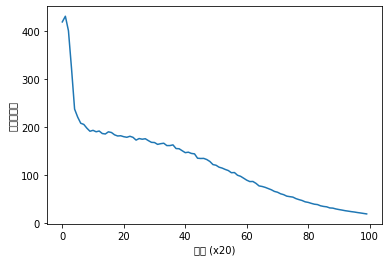

In [99]:
# 위의 코드를 Trainer 클래스로 감추기
# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()